## Scraping and Structured Data
Retrieved data using YouTube API data and transformed data into csv format

In [1]:
# Load required packages
import googleapiclient.discovery
import pandas as pd
import csv
from apiclient.discovery import build

In [ ]:
# Set parameters for the youtube API
api_service_name = 'youtube'
api_version = 'v3'
key = 'xxxxxXxxxxx' # Input the google developer key API
youtube = build(api_service_name, api_version, developerKey = key)
video_id = 'njnwYSybwko'

# Create columns to store data
box = [['Name', 'Comment', 'Likes']]

def get_comments():
    data = youtube.commentThreads().list(
        part = 'snippet', 
        videoId = video_id,
        textFormat = 'plainText').execute()

    for i in data['items']:
        name = i['snippet']['topLevelComment']['snippet']['authorDisplayName']
        comment = i['snippet']['topLevelComment']['snippet']['textDisplay']
        likes = i['snippet']['topLevelComment']['snippet']['likeCount']

        box.append([name, comment, likes])

    while ('nextPageToken' in data):
        data = youtube.commentThreads().list(part = 'snippet', videoId = video_id, pageToken = data['nextPageToken'], 
                                             textFormat = 'plainText').execute()

        for i in data['items']:
            name = i['snippet']['topLevelComment']['snippet']['authorDisplayName']
            comment = i['snippet']['topLevelComment']['snippet']['textDisplay']
            likes = i['snippet']['topLevelComment']['snippet']['likeCount']

            box.append([name, comment, likes])

    df = pd.DataFrame({'Name': [i[0] for i in box], 'Comment': [i[1] for i in box], 'Likes': [i[2] for i in box]})

    df.to_csv('youtube_comments.csv', index = False, header = False)

    return

get_comments()

## Exploratory Data Analysis and Visualization
Applied detect language, text cleaning, and visualization of plots

In [2]:
# Load dataset
df = pd.read_csv('youtube_comments.csv')
print(df.head())
print(df.shape)

              Name                                            Comment  Likes
0  Casper Malmborg       why did they not include his ballerina days?      0
1     Benjamin Sun  The actor who played tupac in straight outta C...      0
2        MrVivekkp                                          SCRIPTED!      0
3           Jazz L  The trailer is much better than the movie. Me ...      0
4    Michael Adams  Stop taking black leaders and changing their i...      0
(2072, 3)


In [3]:
# Check null values in the data frame
df.isnull().sum()

Name       0
Comment    0
Likes      0
dtype: int64

In [4]:
# Load required packages
import string
from langdetect import detect

In [5]:
# Filter for the english language only
def detect_en(x):
    try:
        return detect(x) == 'en'
    except:
        return False

df = df[df['Comment'].apply(detect_en)]
print(df.head())
print(df.shape)

              Name                                            Comment  Likes
0  Casper Malmborg       why did they not include his ballerina days?      0
1     Benjamin Sun  The actor who played tupac in straight outta C...      0
3           Jazz L  The trailer is much better than the movie. Me ...      0
4    Michael Adams  Stop taking black leaders and changing their i...      0
5           George  Demetrius would of done tupac proud. Well done...      0
(1701, 3)


In [6]:
# Sort data frame based on highest likes
df.sort_values(by = ['Likes'], ascending = False).head(5)

,Name,Comment,Likes
1820,Peter Stark,I hate how the actor looks like him but doesn'...,4543
361,MyWifeLeftMe &SheTookDaKids,Tupac wrote the book of rap.\nEminem finished ...,2574
1086,Devonte Redwine,"""We must not hate those who have done wrong to...",2195
1855,mgthaking,I think people forget how young Tupac was!!!He...,2030
775,choppa,"I was in class and I heard someone say ""lil ya...",1807


In [7]:
# Perform text cleaning using regular expression
df['Comment'] = df.Comment.str.replace("[;\',[|]\"()\[\]]", '', regex = True)\
                          .str.replace("\n", " ", regex = True)  

# Check the results after text cleaning
df.sort_values(by = ['Likes'], ascending = False).head(5)

,Name,Comment,Likes
1820,Peter Stark,I hate how the actor looks like him but doesn'...,4543
361,MyWifeLeftMe &SheTookDaKids,Tupac wrote the book of rap. Eminem finished i...,2574
1086,Devonte Redwine,"""We must not hate those who have done wrong to...",2195
1855,mgthaking,I think people forget how young Tupac was!!!He...,2030
775,choppa,"I was in class and I heard someone say ""lil ya...",1807


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Append new column if there are likes or no likes
df['Likes Count'] = df['Likes'].apply(lambda x: 1 if x > 0 else 0)
df

,Name,Comment,Likes,Likes Count
0,Casper Malmborg,why did they not include his ballerina days?,0,0
1,Benjamin Sun,The actor who played tupac in straight outta C...,0,0
3,Jazz L,The trailer is much better than the movie. Me ...,0,0
4,Michael Adams,Stop taking black leaders and changing their i...,0,0
5,George,Demetrius would of done tupac proud. Well done...,0,0
...,...,...,...,...
2064,GewoonRood,"I remember you was conflicted,",2,1
2065,Sco,Ayo Marlo Stanfield,1,1
2066,Kelechi Aguocha,Don't read my profile picture Don't read...,0,0
2067,Zinny Donovan,"Shit, I'm early! FIRST!",2,1


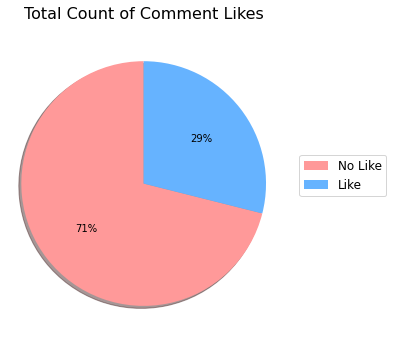

In [10]:
# Calculate percentage of likes count
def label(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

# Create a pie chart
fig, (ax1) = plt.subplots(ncols = 1, figsize=(5, 5))
colors = ['#ff9999', '#66b3ff']
df.groupby('Likes Count').size().plot(kind = 'pie', autopct='%1.0f%%', colors = colors, ax = ax1, startangle = 90, shadow = True, labeldistance = None)
ax1.set_title('Total Count of Comment Likes', fontsize = 16)
ax1.set_ylabel('')
plt.legend(bbox_to_anchor = (1.1, 0.5), loc = 'center right', fontsize = 12, bbox_transform = plt.gcf().transFigure, labels = ['No Like', 'Like'])
plt.axis('equal')
plt.tight_layout()
plt.show()

## Sentiment Analysis
Classification of opinions and word cloud visualization

In [11]:
# Load required packages
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS

In [12]:
# Load comment column into textblob
comment_blob = [TextBlob(comment) for comment in df['Comment']]

In [13]:
# Store the function into new name
analyzer = SentimentIntensityAnalyzer()

# Sentiment test on more positive example
print(analyzer.polarity_scores('The trailer is good'))

# Sentiment test on more negative example
print(analyzer.polarity_scores('The trailer is bad'))

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}


In [14]:
# Create a function to simplify the range of compound score into 3 stages
def sentiment_scores(text):
    score = analyzer.polarity_scores(text)
    x = score['compound']
    if x >= 0.05:
        return 1
    elif (x > -0.05) and (x < 0.05):
        return 0
    else:
        return -1

# Test the function
print(sentiment_scores('the trailer is very good')) # 1 is positive
print(sentiment_scores('the trailer is slow')) # 0 is neutral
print(sentiment_scores('the trailer is very bad')) # -1 is negative

1
0
-1


In [15]:
# Create sentiment metrics into the data frame
df['Sentiment'] = [sentiment_scores(v) for v in df['Comment']]
df.head()

,Name,Comment,Likes,Likes Count,Sentiment
0,Casper Malmborg,why did they not include his ballerina days?,0,0,0
1,Benjamin Sun,The actor who played tupac in straight outta C...,0,0,1
3,Jazz L,The trailer is much better than the movie. Me ...,0,0,1
4,Michael Adams,Stop taking black leaders and changing their i...,0,0,-1
5,George,Demetrius would of done tupac proud. Well done...,0,0,1


Text(0.5, 1.0, 'Sentiment Metrics of Comment')

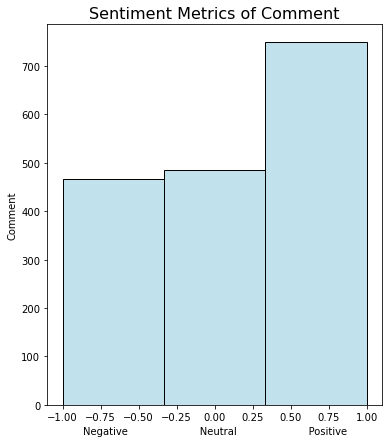

In [16]:
# Visualize count of sentiment
fig, (ax2) = plt.subplots(ncols = 1, figsize=(6, 7))
ax2 = sns.histplot(df, x = 'Sentiment', kde = False, bins = 3, color = 'lightblue')
ax2.set(xlabel ='Negative                       Neutral                       Positive',
       ylabel ='Comment')
ax2.set_title('Sentiment Metrics of Comment', fontsize = 16)

In [17]:
# Set parameters for plotting word cloud
def word_cloud(wd_list):
    stopwords = set (STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color = 'black',
        stopwords = stopwords,
        collocations = False,
        width = 1600,
        height = 800,
        random_state = 22,
        colormap = 'turbo',
        max_words = 100,
        max_font_size = 200).generate(all_words)
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation= 'bilinear')

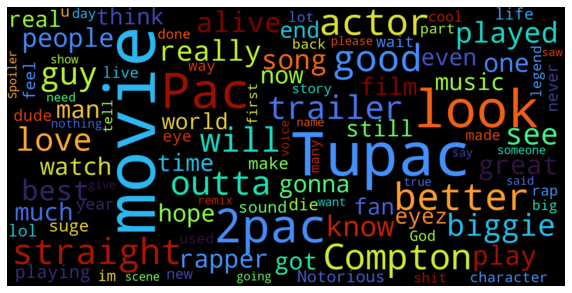

In [18]:
# Visualize the comment of positive sentiment
comment_pos = df['Comment'][df['Sentiment'] == 1]
word_cloud(comment_pos)           

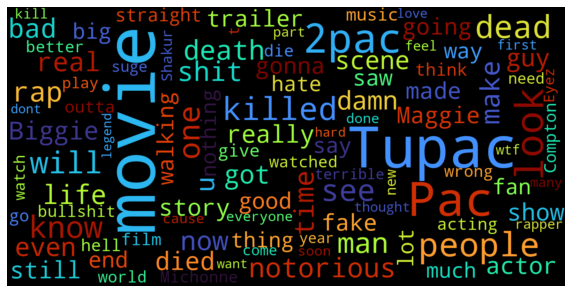

In [19]:
# Visualize the comment of negative sentiment
comment_neg = df['Comment'][df['Sentiment'] == -1]
word_cloud(comment_neg)   